In [7]:
import keras
print(keras.__version__)
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

2.15.0


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
print(np.__version__)

1.25.2


In [10]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [11]:
X_train = []
y_train = []
image_size = 150
labels = ['Tomato___Bacterial_spot',
          'Tomato___Early_blight',
          'Tomato___healthy',
          'Tomato___Late_blight',
          'Tomato___Leaf_Mold',
          'Tomato___Septoria_leaf_spot',
          'Tomato___Target_Spot',
          'Tomato___Tomato_mosaic_virus',
          'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
          'Tomato___Spider_mites Two-spotted_spider_mite']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/train',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_test=[]
y_test=[]

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/val',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

<ipython-input-23-e67b31ca4be5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_list, y=counts, palette='viridis')


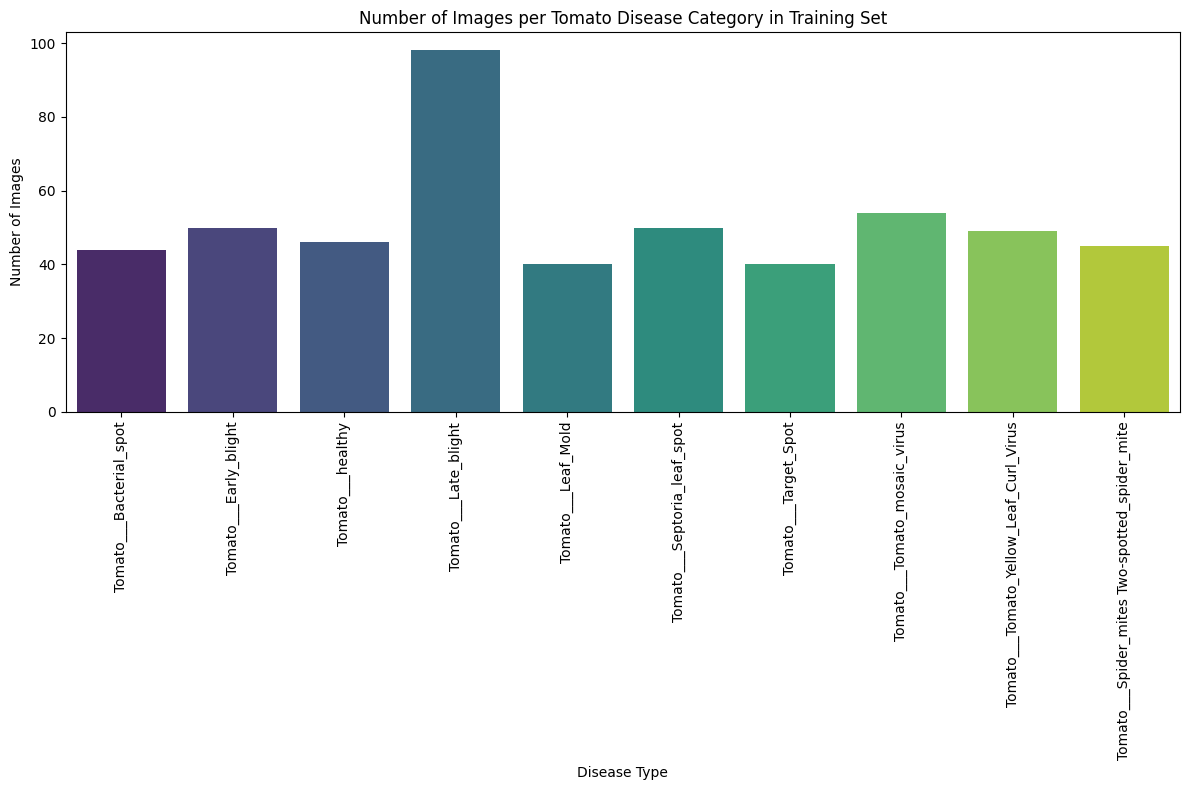

In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is your list of categories
image_count = {}

# Loop through each label
for label in labels:
    folder_path = os.path.join('/content/drive/MyDrive/train', label)
    image_count[label] = len(os.listdir(folder_path))

# Now 'image_count' dictionary contains each label and its corresponding number of images

# Convert the dictionary to lists for plotting
labels_list, counts = zip(*image_count.items())

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=labels_list, y=counts, palette='viridis')
plt.xticks(rotation=90)  # Rotate the labels to make them readable
plt.xlabel('Disease Type')
plt.ylabel('Number of Images')
plt.title('Number of Images per Tomato Disease Category in Training Set')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [13]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

32/32 [==============================] - 1s 17ms/step


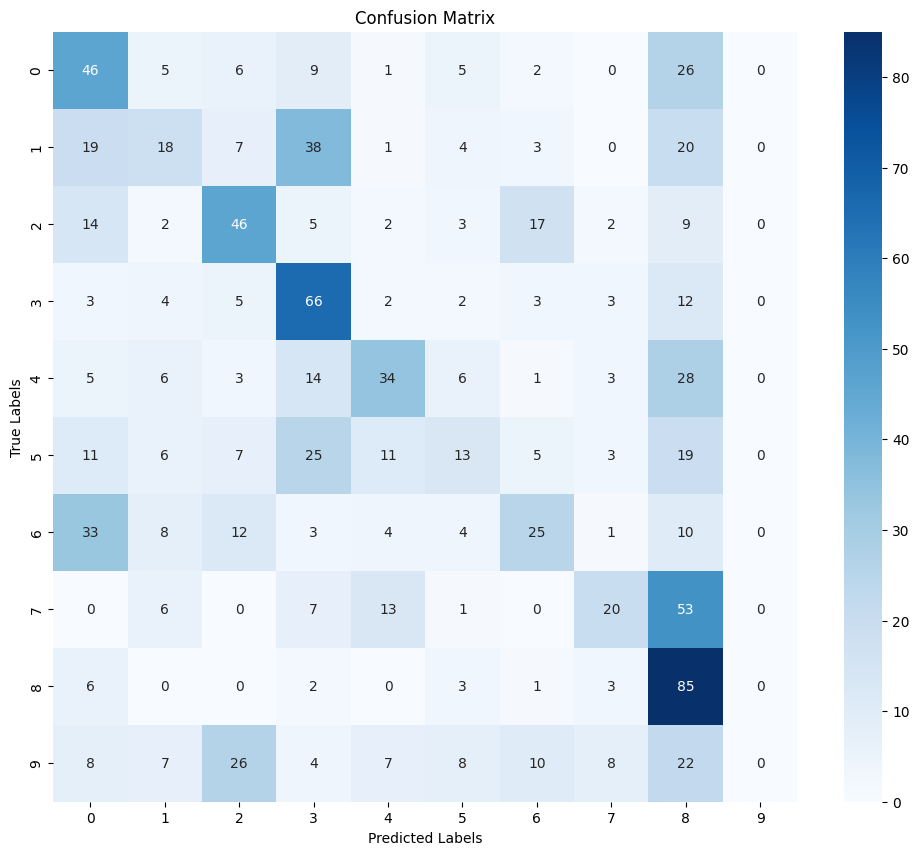

In [19]:
# Predict the values from the test dataset
Y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
15/15 [==============================] - 18s 366ms/step - loss: 5.1592 - accuracy: 0.1552 - val_loss: 2.6771 - val_accuracy: 0.0000e+00
Epoch 2/50
15/15 [==============================] - 1s 90ms/step - loss: 2.2033 - accuracy: 0.1918 - val_loss: 3.1908 - val_accuracy: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 1s 89ms/step - loss: 2.1649 - accuracy: 0.2112 - val_loss: 3.2342 - val_accuracy: 0.0000e+00
Epoch 4/50
15/15 [==============================] - 1s 90ms/step - loss: 2.1444 - accuracy: 0.2177 - val_loss: 3.1107 - val_accuracy: 0.0000e+00
Epoch 5/50
15/15 [==============================] - 1s 96ms/step - loss: 2.1197 - accuracy: 0.2112 - val_loss: 3.6569 - val_accuracy: 0.0000e+00
Epoch 6/50
15/15 [==============================] - 1s 94ms/step - loss: 2.0783 - accuracy: 0.1789 - val_loss: 3.2025 - val_accuracy: 0.0000e+00
Epoch 7/50
15/15 [==============================] - 1s 97ms/step - loss: 2.0353 - accuracy: 0.3125 - val_loss: 5.1354 - val_accu

In [18]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 1s 47ms/step - loss: 2.9258 - accuracy: 0.3495


[2.9258363246917725, 0.3495049476623535]

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

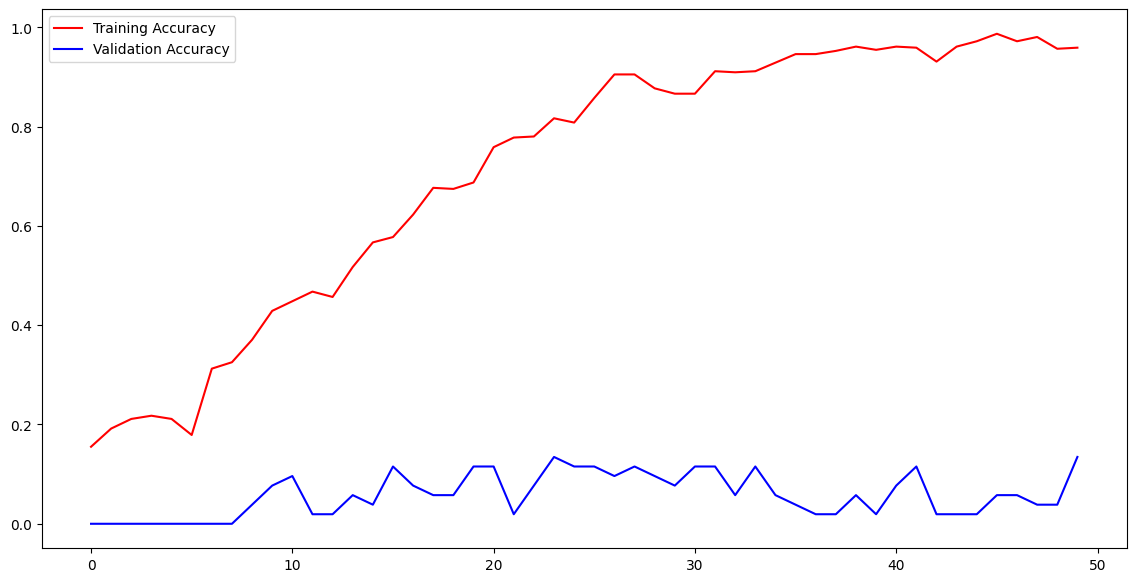

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

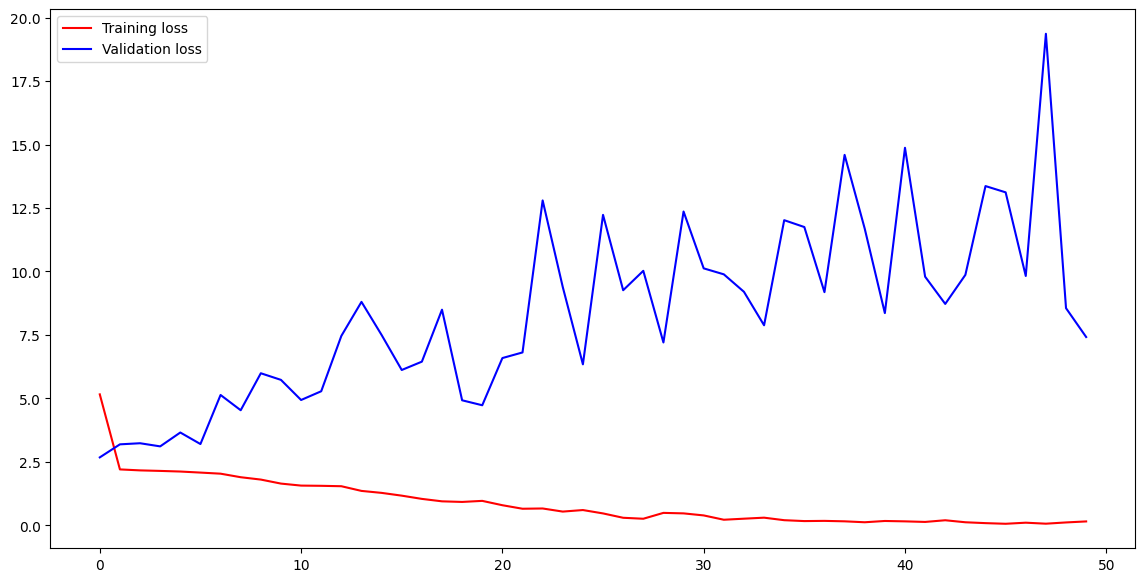

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()